# Good quality selection: flag analysis

Let us import the butler to access the data output repository

In [1]:
from lsst.daf.persistence import Butler

We'll use results from coadd processing from the HSC weekly reprocessing. See more info here: https://confluence.lsstcorp.org/display/DM/S18+HSC+PDR1+reprocessing

In [2]:
datadir = '/datasets/hsc/repo/rerun/DM-13666/UDEEP/'
butler = Butler(datadir)

Which dataset types are available? which tracts, patches and filter IDs can I use? It would be awesome if we could query the butler repository for coadd metadata. Gen3 will fix that ;)

In [3]:
# butler.queryMetadata('deepCoadd_forced_src', ['tract', 'filter', 'patch'], dataId={'tract': 8766, 'filter': 'HSC-G', patch: '8,3'} )

So, I have to know in advance the name of the dataset type, the tract, patch IDs and filter, which i get from the wiki page.

In [4]:
dataset_type = 'deepCoadd_forced_src'
tract=8765 
patch='1,2' 
filters=['HSC-I', 'HSC-Y'] 

In [5]:
catalogs = [butler.get(dataset_type, dataId={'tract': tract, 'patch': patch, 'filter': filter}) 
            for filter in filters]

How to get the columns available in the catalog? The best option seems to convert the catalog to an Astropy table and use the info or colnames method.



In [16]:
table = catalogs[0].asAstropy()

table.colnames

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'deblend_nChild',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xSigma',
 'base_SdssCentroid_ySigma',
 'base_SdssCentroid_flag',
 'base_SdssCentroid_flag_edge',
 'base_SdssCentroid_flag_noSecondDerivative',
 'base_SdssCentroid_flag_almostNoSecondDerivative',
 'base_SdssCentroid_flag_notAtMaximum',
 'base_SdssCentroid_flag_resetToPeak',
 'base_TransformedCentroid_x',
 'slot_Centroid_x',
 'base_TransformedCentroid_y',
 'slot_Centroid_y',
 'base_TransformedCentroid_flag',
 'base_CircularApertureFlux_flag_badCentroid',
 'base_GaussianFlux_flag_badCentroid',
 'base_InputCount_flag_badCentroid',
 'base_LocalBackground_flag_badCentroid',
 'base_PsfFlux_flag_badCentroid',
 'base_SdssCentroid_flag_badInitialCentroid',
 'base_SdssShape_flag_badCentroid',
 'base_Variance_flag_badCentroid',
 'ext_convolved_ConvolvedFlux_0_flag_badCentroid',
 'ext_convolved_ConvolvedFlux_1_flag_badCentroid',
 'ext_convolved_ConvolvedFlux_2_flag_bad

Here we filter all columns that have 'PixelFlags' in their names and get their descriptions.

In [6]:
import pandas as pd
flags = [ (colname, table[colname].description) for colname in table.colnames if '_flag_' in colname]
pd.DataFrame(flags, columns=['Column Name', 'Description'])

,Column Name,Description
0,base_SdssCentroid_flag_edge,Object too close to edge
1,base_SdssCentroid_flag_noSecondDerivative,Vanishing second derivative
2,base_SdssCentroid_flag_almostNoSecondDerivative,Almost vanishing second derivative
3,base_SdssCentroid_flag_notAtMaximum,Object is not at a maximum
4,base_SdssCentroid_flag_resetToPeak,set if CentroidChecker reset the centroid
5,base_CircularApertureFlux_flag_badCentroid,whether the reference centroid is marked as bad
6,base_GaussianFlux_flag_badCentroid,whether the reference centroid is marked as bad
7,base_InputCount_flag_badCentroid,whether the reference centroid is marked as bad
8,base_LocalBackground_flag_badCentroid,whether the reference centroid is marked as bad
9,base_PsfFlux_flag_badCentroid,whether the reference centroid is marked as bad


Now we want to know the fraction of objects rejected by each flag:

In [11]:
tables = [catalog.asAstropy() for catalog in catalogs]

def format_fraction(table, colname):
    size = len(table)
    fraction = "{}%".format(int(len(table[table[colname]==True])/size*100))
    return fraction

fraction_rejected = [(colname, format_fraction(tables[0], colname), 
                               format_fraction(tables[1], colname)) 
                     for colname, description in flags]
pd.DataFrame(fraction_rejected, columns=['Flag'] + filters)

,Flag,HSC-I,HSC-Y
0,base_SdssCentroid_flag_edge,3%,3%
1,base_SdssCentroid_flag_noSecondDerivative,0%,0%
2,base_SdssCentroid_flag_almostNoSecondDerivative,3%,3%
3,base_SdssCentroid_flag_notAtMaximum,35%,38%
4,base_SdssCentroid_flag_resetToPeak,2%,1%
5,base_CircularApertureFlux_flag_badCentroid,15%,15%
6,base_GaussianFlux_flag_badCentroid,15%,15%
7,base_InputCount_flag_badCentroid,15%,15%
8,base_LocalBackground_flag_badCentroid,15%,15%
9,base_PsfFlux_flag_badCentroid,15%,15%


In [8]:
flags_to_reject_on = ['base_PixelFlags_flag_bright_objectCenter', 'base_PixelFlags_flag_saturated', 'base_PixelFlags_flag_cr' ]

Here you can select objects based on a flag and see if there is any spatial pattern 

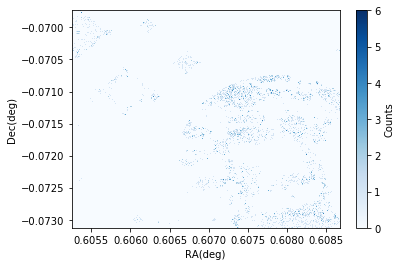

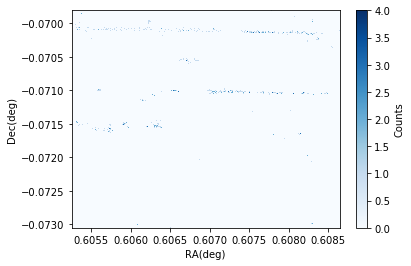

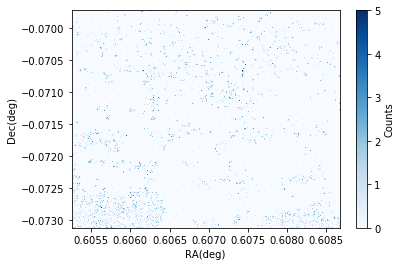

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

for flag in flags_to_reject_on:
    index = table[flag]==True
    plt.figure()
    plt.hist2d(tables[0]['coord_ra'][index], tables[0]['coord_dec'][index], bins=(300, 300), cmap='Blues')
    plt.colorbar(label='Counts')
    plt.xlabel('RA(deg)')
    plt.ylabel('Dec(deg)')
    plt.show()

Does the stack provide a method to combine flags?

In [ ]:
index_i = [any([table_i[flag][i] for flag in flags_to_reject_on]) for i in range(len(t))]

good_objects = t[index_i]
